In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# MNIST Data Load
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print(x_train.shape, y_train.shape, y_train[0])
print(x_test.shape, y_test.shape, y_test[0])

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (60000,) 5
(10000, 28, 28) (10000,) 7


image.shape =  (28, 28)


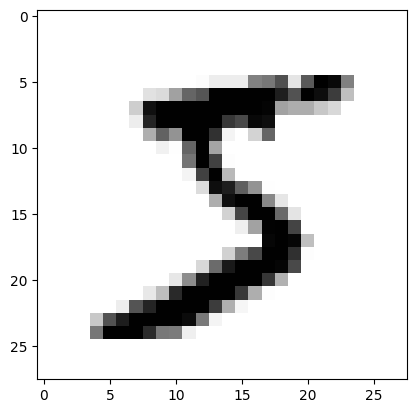

In [3]:
# Train data 확인인
img = x_train[0]
print("image.shape = ", img.shape)
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [5]:
# 3D tensor
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

In [6]:
# Reshape example
a = tf.random.normal([3,3,3])
print(a)
a = tf.reshape(a,(3,3,3,1))
print(a)

tf.Tensor(
[[[ 2.6154068  -0.58638525 -1.0112902 ]
  [-0.7201011  -0.37477645  0.4938365 ]
  [-0.5236988   1.2781569   0.90472436]]

 [[ 0.6073691   0.9230955  -0.3283902 ]
  [-1.239434   -1.6529423   0.6373437 ]
  [-0.28862548  0.21155156  0.5875303 ]]

 [[ 0.7439579   0.66334885  0.7040451 ]
  [-1.5576637   0.5873576  -0.16688718]
  [ 0.64448553  0.14027192  0.1750676 ]]], shape=(3, 3, 3), dtype=float32)
tf.Tensor(
[[[[ 2.6154068 ]
   [-0.58638525]
   [-1.0112902 ]]

  [[-0.7201011 ]
   [-0.37477645]
   [ 0.4938365 ]]

  [[-0.5236988 ]
   [ 1.2781569 ]
   [ 0.90472436]]]


 [[[ 0.6073691 ]
   [ 0.9230955 ]
   [-0.3283902 ]]

  [[-1.239434  ]
   [-1.6529423 ]
   [ 0.6373437 ]]

  [[-0.28862548]
   [ 0.21155156]
   [ 0.5875303 ]]]


 [[[ 0.7439579 ]
   [ 0.66334885]
   [ 0.7040451 ]]

  [[-1.5576637 ]
   [ 0.5873576 ]
   [-0.16688718]]

  [[ 0.64448553]
   [ 0.14027192]
   [ 0.1750676 ]]]], shape=(3, 3, 3, 1), dtype=float32)


In [7]:
# float32 로 데이터 타입을 변경경
x_train = np.array(x_train, np.float32)
x_test = np.array(x_test, np.float32)

In [8]:
# Normalize
x_train = x_train/255
x_test = x_test/255

In [10]:
# Step 1. Feature Learning
model = Sequential()

# output size formula: { (N - F + 2P) / stride } +1
# parameter formual: K(F^2 * C + 1)

# filter number: 32, filter_size = 3x3, (default) stride = 1, padding = 'valid' (= no padding)
model.add(Conv2D(32, (3,3), activation = "relu", input_shape = (28,28,1)))
# output shape = {(28-3)/1} +1 = 26 => feature map = 26 x 26 x 32

# pool_size = 2x2, stride = None, padding = "valid" (= no padding)
model.add(MaxPooling2D((2,2)))
# output shape = 26/2 = 13 => feature map = 13 x 13 x 32

model.add(Conv2D(64, (3,3), activation = "relu"))
# output shape = {(13-3)/1} +1 = 11 => feature map = 11 x 11 x 64

model.add(MaxPooling2D((2,2)))
# output shape = 11/2 = 5,5 => 5 => feature map = 5 x 5 x 64

model.add(Conv2D(64, (3,3), activation = "relu"))
# output shape = {(5-3)/1} +1 = 3 x 3 x 64


In [11]:
# Step 2. Fully Conneted Layer
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [12]:
# model compile: cost function, optimizer, metric 설정
model.compile(optimizer="adam",
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
# Training
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 4ms/step - loss: 0.1554 - accuracy: 0.9520
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0497 - accuracy: 0.9843
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0344 - accuracy: 0.9891
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0266 - accuracy: 0.9917
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0229 - accuracy: 0.9926


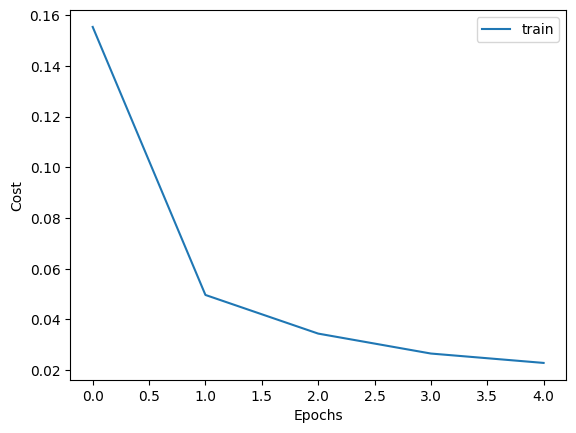

In [14]:
# Visualization
plt.plot(history.history['loss'], label = "train")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [15]:
# Performance check with accruacy metric
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: ", test_acc)

313/313 - 1s - loss: 0.0276 - accuracy: 0.9916 - 972ms/epoch - 3ms/step
Test accuracy:  0.991599977016449


image.shape =  (28, 28, 1)


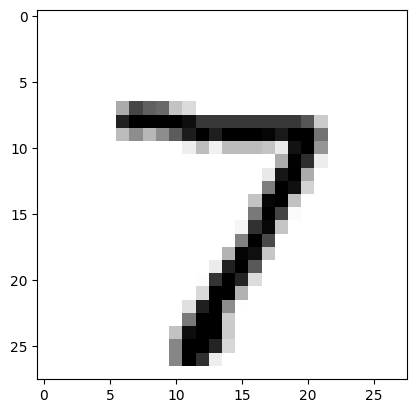

In [16]:
img = x_test[0]
print("image.shape = ", img.shape)
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [18]:
(1/10)**13

1.0000000000000007e-13

In [17]:
# Prediction example
predictions = model.predict(x_test)

print(predictions[0])
print(np.argmax(predictions[0]))
print(y_test[0])

313/313 [==============================] - 1s 2ms/step
[1.3171346e-07 2.3666507e-08 5.0742160e-06 8.5065667e-06 9.7597770e-08
 5.1097163e-07 6.6373372e-11 9.9998188e-01 1.0004998e-06 2.8241509e-06]
7
7


In [ ]:
with tf.device('/device:GPU:0'):
  # Feature Learning
  model = Sequential()
  model.add(Conv2D(32, (3,3), input_shape = (28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64, (3,3)))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64, (3,3)))
  # Fully Conneted Layer
  model.add(Flatten())
  model.add(Dense(64, activation = "relu"))
  model.add(Dense(10, activation = "softmax"))
  model.summary()
  # model compile: cost function, optimizer, metric 설정
  model.compile(optimizer="adam",
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  # Training
  history = model.fit(x_train, y_train, epochs=5)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

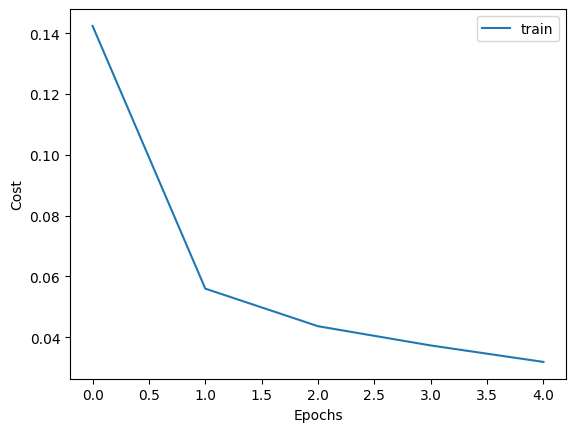

In [ ]:
# Visualization
plt.plot(history.history['loss'], label = "train")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [ ]:
# Performance check with accruacy metric
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: ", test_acc)

313/313 - 1s - loss: 0.0521 - accuracy: 0.9858 - 1s/epoch - 4ms/step
Test accuracy:  0.98580002784729


In [ ]:
# Prediction example

predictions = model.predict(x_test)

print(predictions[0])
print(np.argmax(predictions[0]))
print(y_test[0])

313/313 [==============================] - 1s 2ms/step
[3.2748932e-09 4.6778129e-07 5.2421182e-08 8.4333756e-08 9.7640270e-07
 6.9076911e-11 9.6651315e-12 9.9997997e-01 9.9553426e-07 1.7426897e-05]
7
7
